In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
#Uploading (reading) the Titanic Dataset
Titanic = pd.read_csv('Titanic.csv')

In [102]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
import pandas_profiling as pp
from IPython.display import IFrame

# Titanic Profile Report
TitanicReport = pp.ProfileReport(Titanic)
TitanicReport.to_file('TitanicReport.html')
display(IFrame('TitanicReport.html', width=900, height=350))

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

We did the Pandas Profiling to save the time and get the most inside from the data. We see the Heatmap where we can analyse Pearson Correlationship and also missing data (from age, cabin) also some interdependency of indpendent varibles. Also the output "Survived" has imbalance output (more decessed than alive). Let's move on and do some EDA and try to fill the missing data. Now we will do intense "Exploratory Data Analysis".

In [105]:
# Missing Data to handle (but not the effective way to look at the whole dataset)
Titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

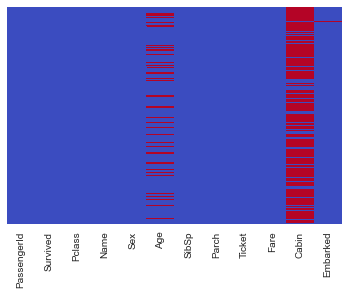

In [106]:
sns.heatmap(Titanic.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

The two features as we seen in Pandas profiling (Age and Cabin) has missing values in which Cabin has almost 90% missing values, however we can manage to deal with Age by looking at it's relationship with some other variable or oversampling.
We might need to drop the Cabin completely or else we can keep it but can change that Cabin Status Known (1), not known (0).

We can get the idea by looking at the Pandas Profiile (Heatmap) and then can draw boxplot to look at the distribution.

<AxesSubplot:xlabel='Survived', ylabel='count'>

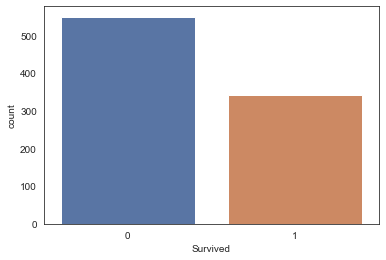

In [129]:
# Looking at our total Survival Status by plotting a simple bar graph (using 'whitegrid' or 'white')
sns.set_style('white')
sns.countplot(x='Survived',data=Titanic, palette='deep')

<AxesSubplot:xlabel='Survived', ylabel='count'>

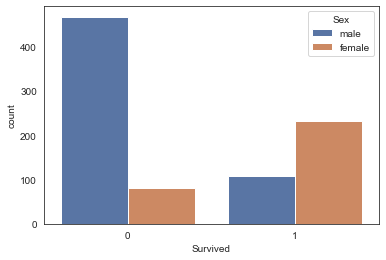

In [130]:
# Looking at the Gender (sex) ratio of survival
sns.set_style('white')
sns.countplot(x='Survived',hue='Sex',data=Titanic, palette='deep')

<AxesSubplot:xlabel='Survived', ylabel='count'>

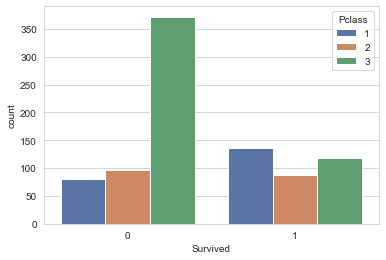

In [128]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=Titanic,palette='deep')

<AxesSubplot:xlabel='Age'>

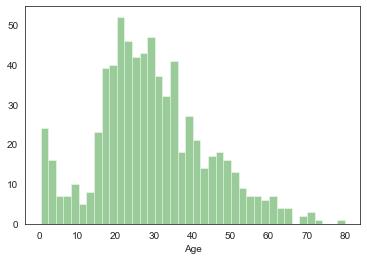

In [141]:
# Age data is missing but we are using the Age by droping the Null Value first 
sns.distplot(Titanic['Age'].dropna(),kde=False,color='green',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

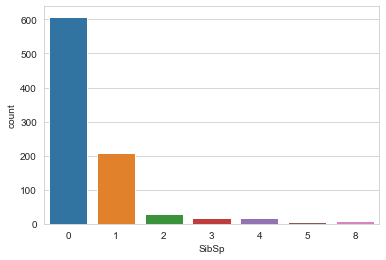

In [42]:
# Now looking at all the individual variables. Lets look at Sibling and Spouse passengers on board
sns.countplot(x='SibSp',data=Titanic)

<AxesSubplot:>

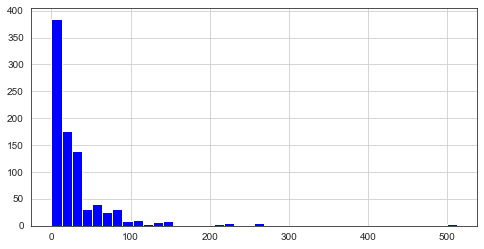

In [137]:
Titanic['Fare'].hist(color='blue',bins=40,figsize=(8,4))

Let's Balance The feature AGE, wherein we have options such as Median, Mode (imputation) but that will lead biases instead we can use Passenger Class or Survival Class. However using Survival class, we have to be careful b'cas Old age and Childrens were the first priority to safeguard during the crisis, therefore we cannot say that old people/children had less chances of survival. So, lets use Passenger Class. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

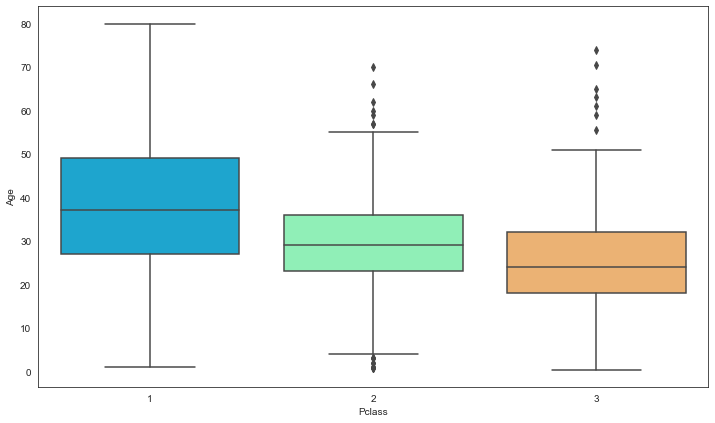

In [143]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=Titanic,palette='rainbow')

The distribution for 2nd & 3rd class passengers have many outliers and also the Median-Age is less than first to second and to third ssubsequently. Meaning, wealthier passengers are likely to be little older due to income stablity than other respective classes. 

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

<AxesSubplot:>

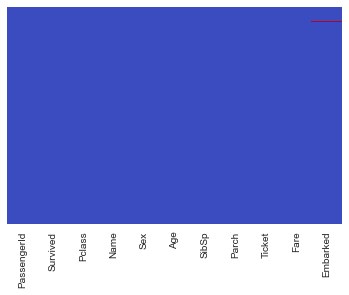

In [58]:
# We are applying the above function in first line of code and Heat map on the second line of code 
Titanic['Age'] = Titanic[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(Titanic.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Now we don't have any missing values in the Age column and we should drop the Cabin, otherwise if we are interested to do intense oversampling or use SMOTE technique.

In [ ]:
#Titanic.drop('Cabin',axis=1,inplace=True)

In [62]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
Titanic.dropna(inplace=True)

Its time to change all the Categorical values by One-Hot Encoding. We will use dummy varaibles (trap) using pandas.  

In [64]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [65]:
# Using dummy varaible trap method because Embarked has three-categories
pd.get_dummies(Titanic['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [66]:
# Using dummy varaible trap method because Embarked has three-categories
pd.get_dummies(Titanic['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [67]:
# Sex and Embarked will get change by dummy variable trap.
sex = pd.get_dummies(Titanic['Sex'],drop_first=True)
embark = pd.get_dummies(Titanic['Embarked'],drop_first=True)

In [68]:
# Now we drop these 04 features and later we will concatenate the dummy varaibles we have created above
Titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [69]:
Titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [70]:
Titanic = pd.concat([Titanic,sex,embark],axis=1)

In [71]:
Titanic.head() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now the data is ready to perform modling on (for the base model and further for optimization with the help of data pipeline)

As we know out OUOUTPUT class has imbalanced ratio (Died '0'=549, Survived '1'=342 ) therefore we will balance the dataset first with the help of SMOTE and then we will split for test & train (80%-20%).
We are going to perform Logistric Regression, LDA and QDA

In [76]:
#Create x and y variables
x = Titanic.drop('Survived', axis=1).to_numpy()
Y = Titanic['Survived'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [77]:
#Class Balance - Test Data
print('SMOTE - Class Split')
num_zeros = (y_train_smt == 0).sum()
num_ones = (y_train_smt == 1).sum()
print('Class 0 -',  num_zeros)
print('Class 1 -',  num_ones)

SMOTE - Class Split
Class 0 - 439
Class 1 - 439


Now our dataset is Balanced and we got 439 data points for each class after using SMOTE

In [78]:
#Base LDA, QDA and Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LDA', LinearDiscriminantAnalysis()),('QDA',QuadraticDiscriminantAnalysis()),
                   ('LogReg',LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))     


Estimator: LDA
[[86 24]
 [20 48]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       110
           1       0.67      0.71      0.69        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.76      0.75      0.75       178


Estimator: QDA
[[83 27]
 [16 52]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       110
           1       0.66      0.76      0.71        68

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178


Estimator: LogReg
[[84 26]
 [17 51]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       110
           1       0.66      0.75      0.70        68

    accuracy                           0.76       178
   macro avg       0

The Accuracy across Logistic, LDA & QDA is fairly good and the difference is just notebook. The f1-scores also the quite same across the three models.
Let's optimized it and see the results of confusion matrix.

In [79]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(2,param_gridlogreg)

In [80]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.0])
    plt.show()

LDA Learning Curve


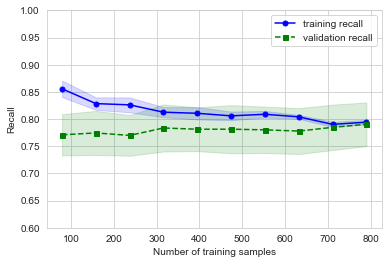


 QDA Learning Curve


C:\Users\Lenovo12\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


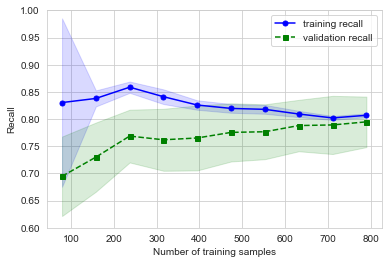


 Logistic Regression Learning Curve


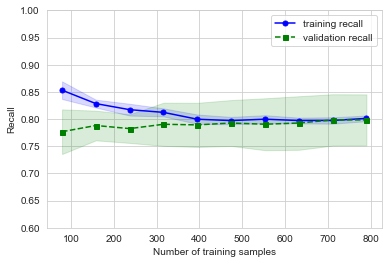

In [81]:
#Plot Learning Curve
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

We can see with the help of plot about our Train and Test dataset performance. Except QDA other two models are learning pretty good and almost there is no variance between the test and train as we have increased the sample.

Model Evaluation - Recall Score
LDA 0.80 +/- 0.04
QDA 0.80 +/- 0.05
Log Reg 0.79 +/- 0.04




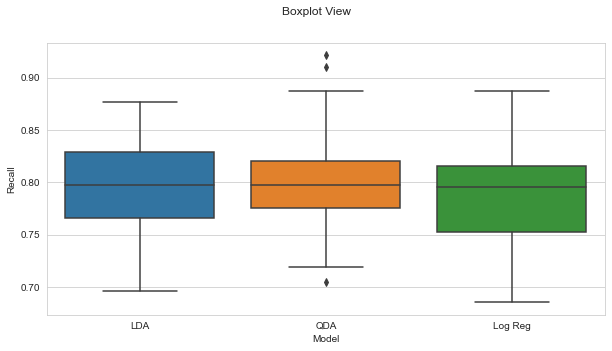

In [83]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))
models.append(('Log Reg',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,Y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n') 

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

We used Recall but we can use anything (Precision, Accuracy etc.) and can see that QDA has some outliers and Log Reg has longer distribution but LDA is doing slightly better job and try to minimize the overall distribution between 69% to 88%.

In [84]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['Outcome 0','Outcome 1']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: LinearDiscriminantAnalysis()

Best Parameters: {'clf__solver': 'svd'}

 [[86 24]
 [20 48]]

               precision    recall  f1-score   support

   Outcome 0       0.81      0.78      0.80       110
   Outcome 1       0.67      0.71      0.69        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.76      0.75      0.75       178

ROC Curve


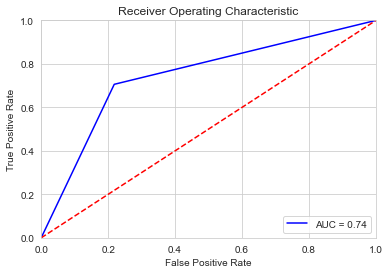


Optimized Model

Model Name: QuadraticDiscriminantAnalysis()

Best Parameters: {}

 [[83 27]
 [16 52]]

               precision    recall  f1-score   support

   Outcome 0       0.84      0.75      0.79       110
   Outcome 1       0.66      0.76      0.71        68

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178

ROC Curve


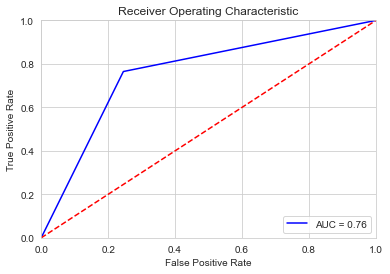


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100)

Best Parameters: {'clf__C': 10, 'clf__penalty': 'l2'}

 [[84 26]
 [17 51]]

               precision    recall  f1-score   support

   Outcome 0       0.83      0.76      0.80       110
   Outcome 1       0.66      0.75      0.70        68

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178

ROC Curve


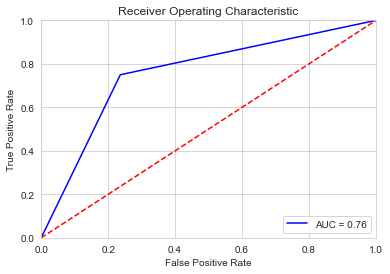

In [85]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

Meaning the Optimization Technique did not impact the model performance with the probablity at all. We can use some other algorithm such as Random Forest and XGBoost where we can use decision trees to improve the model performance.
The AUC we got her is 76% from Logistic and QDA and 74% LDA. Higher AUC is better.
The predictions on Deceased class has produced better performance than alive class. This probably because we used SMOTE to match the output data points where alive class gets created by finding synthetic datapoints by SMOTE. 